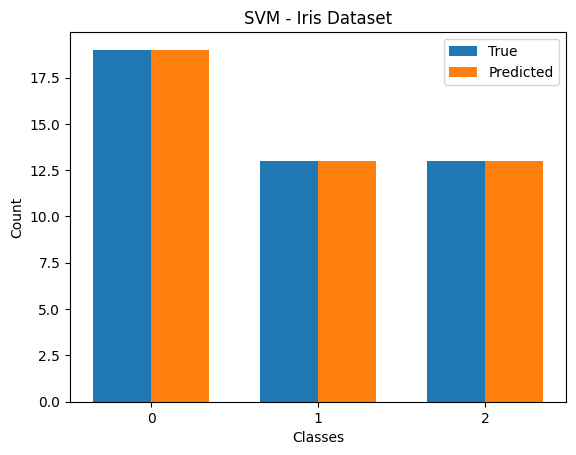

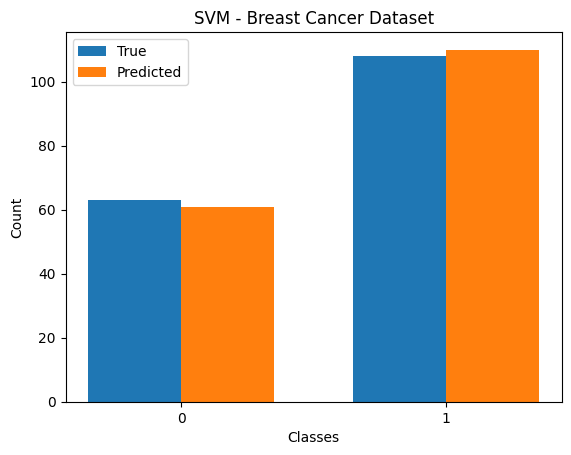

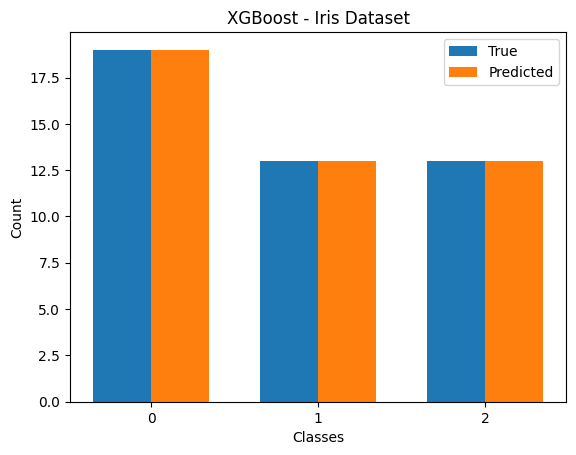

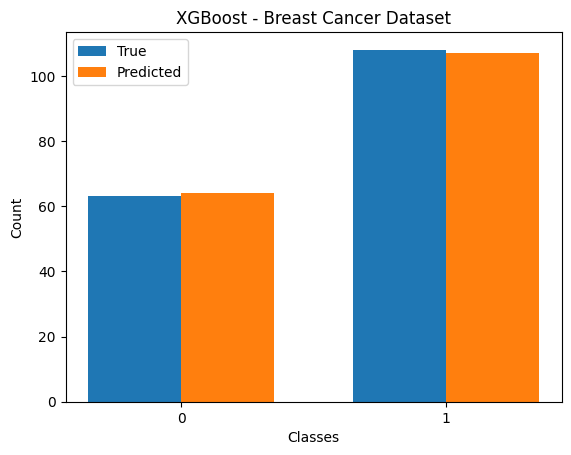

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load the iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Load the breast cancer dataset
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

# Split the data into training and testing sets for both datasets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

# Train and predict using SVM for both datasets
svm_model_iris = SVC(kernel='linear', random_state=42)
svm_model_iris.fit(X_iris_train, y_iris_train)
iris_preds = svm_model_iris.predict(X_iris_test)

svm_model_cancer = SVC(kernel='linear', random_state=42)
svm_model_cancer.fit(X_cancer_train, y_cancer_train)
cancer_preds = svm_model_cancer.predict(X_cancer_test)

# Train and predict using XGBoost for both datasets
xgb_model_iris = XGBClassifier(random_state=42)
xgb_model_iris.fit(X_iris_train, y_iris_train)
xgb_iris_preds = xgb_model_iris.predict(X_iris_test)

xgb_model_cancer = XGBClassifier(random_state=42)
xgb_model_cancer.fit(X_cancer_train, y_cancer_train)
xgb_cancer_preds = xgb_model_cancer.predict(X_cancer_test)

def plot_class_distribution(y_true, y_pred, title):
    labels = sorted(np.unique(y_true))
    true_counts = [(y_true == l).sum() for l in labels]
    pred_counts = [(y_pred == l).sum() for l in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, true_counts, width, label='True')
    ax.bar(x + width/2, pred_counts, width, label='Predicted')
    ax.set_xlabel('Classes')
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

# SVM Charts
plot_class_distribution(y_iris_test, iris_preds, "SVM - Iris Dataset")
plot_class_distribution(y_cancer_test, cancer_preds, "SVM - Breast Cancer Dataset")

# XGBoost Charts
plot_class_distribution(y_iris_test, xgb_iris_preds, "XGBoost - Iris Dataset")
plot_class_distribution(y_cancer_test, xgb_cancer_preds, "XGBoost - Breast Cancer Dataset")

